In [1]:
import tensorflow as tf
import numpy as np
import json
import matplotlib.pyplot as plt
import os
import albumentations as alb
import cv2

c:\Users\rahul\OneDrive\Desktop\Rahul Folder Work\Machine Learning\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\rahul\OneDrive\Desktop\Rahul Folder Work\Machine Learning\myenv\Lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: '2.0.1' (you have '2.0.0'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [ ]:
images=tf.data.Dataset.list_files('data\\images\\*.jpg')

In [5]:
def load_img(img):
    img_in_byte=tf.io.read_file(img)
    img=tf.io.decode_jpeg(img_in_byte)
    return img

In [ ]:
images=images.map(load_img)

In [36]:
# imges.as_numpy_iterator().next()

In [37]:
batch_imgs=images.batch(4).as_numpy_iterator()

In [38]:
plotImg=batch_imgs.next()

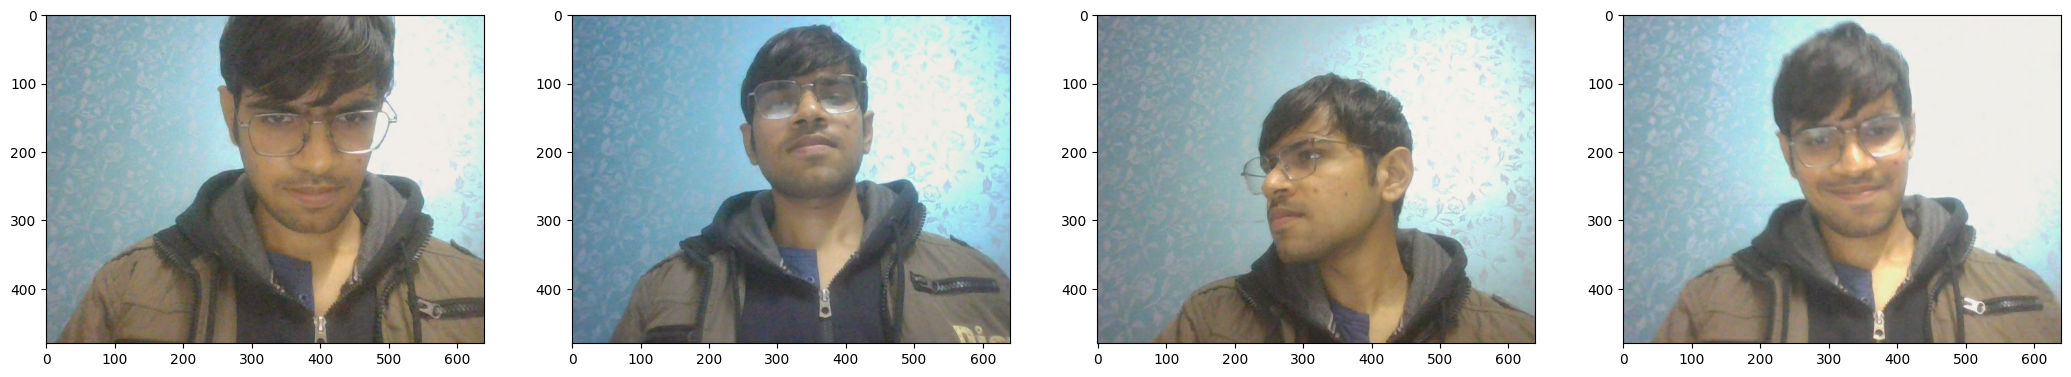

In [39]:
fig,ax=plt.subplots(ncols=4, figsize=(26,26))
for idx, image in enumerate(plotImg):
    ax[idx].imshow(image)
plt.show()     

In [42]:
for folder in ['test','train','val']:
    for file in os.listdir(os.path.join('./data',folder,'images')):
        fName=file.split('.')[0]+'.json'
        fPath=os.path.join('./data/labels',fName)
        if(os.path.exists(fPath)):
            new_f_path=os.path.join('./data',folder,'labels',fName)
            os.replace(fPath,new_f_path)


In [2]:
imageComposing=alb.Compose([
    alb.RandomCrop(width=450, height=450),
    alb.RandomBrightnessContrast(p=0.5),
    alb.HorizontalFlip(p=0.5),
    alb.VerticalFlip(p=0.5),
    alb.RandomGamma(p=0.2),
    alb.RGBShift(p=0.2)],
    bbox_params=alb.BboxParams(format='albumentations',label_fields=['class_labels'])
    )

c:\Users\rahul\OneDrive\Desktop\Rahul Folder Work\Machine Learning\myenv\Lib\site-packages\pydantic\main.py:426: UserWarning: Pydantic serializer warnings:
  Expected `dict[str, any]` but got `UniformParams` with value `UniformParams(noise_type=...6, 0.0784313725490196)])` - serialized value may not be as expected
  return self.__pydantic_serializer__.to_python(


In [3]:
img=cv2.imread(os.path.join('./data/train/images','aae53be9-d5b4-11ef-a869-04bf1b5d278e.jpg'))

In [4]:
with open(os.path.join('./data/train/labels/','aae53be9-d5b4-11ef-a869-04bf1b5d278e.json'), 'r') as f:
    label=json.load(f)

In [5]:
label

{'version': '5.6.0',
 'flags': {},
 'shapes': [{'label': 'face',
   'points': [[253.33333333333334, 86.49122807017542],
    [473.8011695906433, 377.719298245614]],
   'group_id': None,
   'description': '',
   'shape_type': 'rectangle',
   'flags': {},
   'mask': None}],
 'imagePath': '..\\images\\aae53be9-d5b4-11ef-a869-04bf1b5d278e.jpg',
 'imageData': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAHgAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnL

In [7]:
points=[0,0,0,0]
points[0]=label['shapes'][0]['points'][0][0]
points[1]=label['shapes'][0]['points'][0][1]
points[2]=label['shapes'][0]['points'][1][0]
points[3]=label['shapes'][0]['points'][1][1]

In [12]:
points=list(np.divide(points,[640,480,640,480]))

In [16]:
imageComposed=imageComposing(image=img, bboxes=[points], class_labels=['face'])

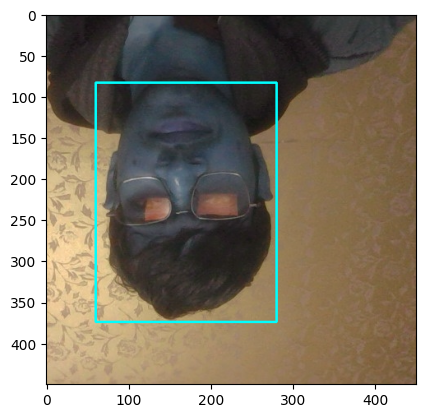

In [25]:
cv2.rectangle(imageComposed['image'],
              tuple(np.multiply(imageComposed['bboxes'][0][:2],[450,450]).astype(int)),
              tuple(np.multiply(imageComposed['bboxes'][0][2:],[450,450]).astype(int)), (0,255,255), 2)
plt.imshow(imageComposed['image'])

In [30]:
for partition in ['train','test','val']:
    for img in os.listdir(os.path.join('data',partition,'images')):
        image=cv2.imread(os.path.join('data',partition,'images',img))

        points=[0,0,0,0]
        label_imgPath=os.path.join('data',partition,'labels',f'{img.split(".")[0]}.json')
        if os.path.exists(label_imgPath):
            with open(label_imgPath,'r') as f:
                label=json.load(f)

            points[0]=label['shapes'][0]['points'][0][0]
            points[1]=label['shapes'][0]['points'][0][1]
            points[2]=label['shapes'][0]['points'][1][0]
            points[3]=label['shapes'][0]['points'][1][1]    
            points=list(np.divide(points,[640,480,640,480]))

        try:
            for i in range(40):
                imageComposed=imageComposing(image=image, bboxes=[points], class_labels=['face'])  
                cv2.imwrite(os.path.join('aug_data',partition,'images',f'{img.split(".")[0]}.{i}.jpg'),imageComposed['image'])

                new_points={}
                new_points['image']=img

                if os.path.exists(label_imgPath):
                    if len(imageComposed['bboxes'])!=0 :
                        new_points['bbox']=imageComposed['bboxes'][0]
                        new_points['class']=1
                    else :
                        new_points['bbox']=[0,0,0,0]
                        new_points['class']=0

                else :
                    new_points['bbox']=[0,0,0,0]
                    new_points['class']=0

                with open(os.path.join('aug_data',partition,'labels',f'{img.split(".")[0]}.{i}.json'),'w') as f:
                    json.dump(new_points, f)         

        except Exception as e:
            print(e)        
        

x_max is less than or equal to x_min for bbox [0. 0. 0. 0. 0.].
x_max is less than or equal to x_min for bbox [0. 0. 0. 0. 0.].
x_max is less than or equal to x_min for bbox [0. 0. 0. 0. 0.].
x_max is less than or equal to x_min for bbox [0. 0. 0. 0. 0.].
x_max is less than or equal to x_min for bbox [0. 0. 0. 0. 0.].
x_max is less than or equal to x_min for bbox [0. 0. 0. 0. 0.].
x_max is less than or equal to x_min for bbox [0. 0. 0. 0. 0.].
x_max is less than or equal to x_min for bbox [0. 0. 0. 0. 0.].
x_max is less than or equal to x_min for bbox [0. 0. 0. 0. 0.].
x_max is less than or equal to x_min for bbox [0. 0. 0. 0. 0.].
x_max is less than or equal to x_min for bbox [0. 0. 0. 0. 0.].
x_max is less than or equal to x_min for bbox [0. 0. 0. 0. 0.].
x_max is less than or equal to x_min for bbox [0. 0. 0. 0. 0.].


In [6]:
trainImages=tf.data.Dataset.list_files('./aug_data/train/images/*.jpg', shuffle=False)
trainImages=trainImages.map(load_img)
trainImages=trainImages.map(lambda x: tf.image.resize(x,(120,120)))
trainImages=trainImages.map(lambda x : x/255)

testImages=tf.data.Dataset.list_files('./aug_data/test/images/*.jpg', shuffle=False)
testImages=testImages.map(load_img)
testImages=testImages.map(lambda x: tf.image.resize(x,(120,120)))
testImages=testImages.map(lambda x : x/255)

valImages=tf.data.Dataset.list_files('./aug_data/val/images/*.jpg', shuffle=False)
valImages=valImages.map(load_img)
valImages=valImages.map(lambda x: tf.image.resize(x,(120,120)))
valImages=valImages.map(lambda x : x/255)

In [24]:
# trainImages.as_numpy_iterator().next()

In [8]:
def load_labels(label_path):
    with open( label_path.numpy() ,'r', encoding='utf-8') as f:
        label=json.load(f)
    return [label['class']], label['bbox']    

In [9]:
train_labels=tf.data.Dataset.list_files('./aug_data/train/labels/*.json', shuffle=False)
train_labels=train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

test_labels=tf.data.Dataset.list_files('./aug_data/test/labels/*.json', shuffle=False)
test_labels=test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

val_labels=tf.data.Dataset.list_files('./aug_data/val/labels/*.json', shuffle=False)
val_labels=val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [10]:
len(train_labels), len(train_labels), len(testImages), len(test_labels), len(val_labels)

(1200, 1200, 440, 440, 640)

In [11]:
train=tf.data.Dataset.zip(trainImages,train_labels)
train=train.shuffle(3000)
train=train.batch(10)
train=train.prefetch(6)

In [12]:
test=tf.data.Dataset.zip(testImages,test_labels)
test=test.shuffle(3000)
test=test.batch(10)
test=test.prefetch(6)

In [10]:
val=tf.data.Dataset.zip(valImages,val_labels)
val=val.shuffle(3000)
val=val.batch(10)
val=val.prefetch(6)

In [14]:
train.save('./saved_train')

In [11]:
val.save('./saved_val')

In [31]:
samples=train.as_numpy_iterator()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


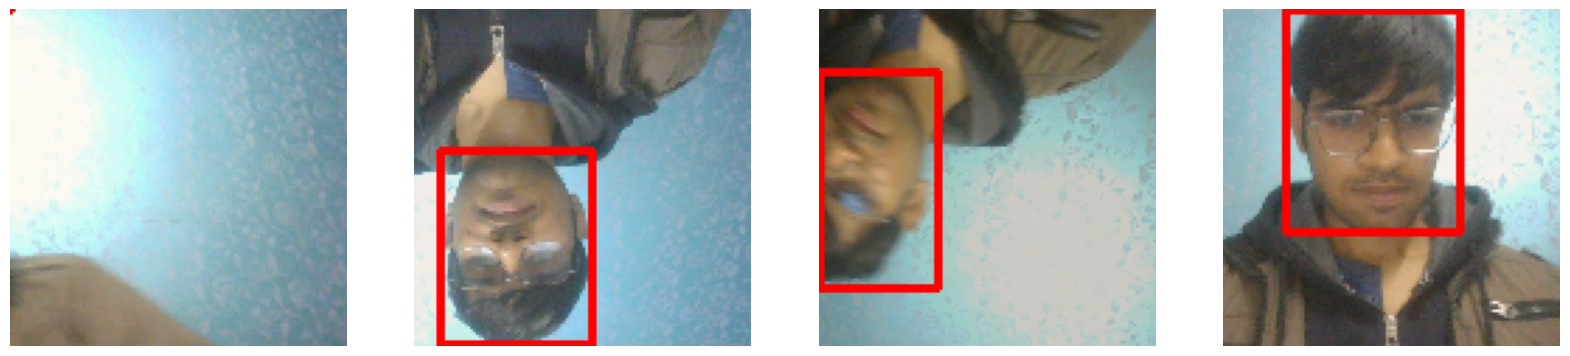

In [44]:
res=samples.next()

fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx in range(4):
    sample_image = res[0][idx].copy()
    sample_coords = res[1][1][idx]

    # Draw rectangle on the image
    cv2.rectangle(sample_image,
                  tuple(np.multiply(sample_coords[:2], [120, 120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120, 120]).astype(int)),
                  (255, 0, 0), 2)

    # Display the image
    ax[idx].imshow(sample_image)
    ax[idx].axis('off')
